In [1]:
# Import pandas ,numpy and matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Read csv file 
data = pd.read_csv('Sales_with_NaNs_v1.3.csv')
data_sample = data.sample(n=100)

In [32]:
print(data_sample.info())
print(data_sample.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1389 to 66
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         82 non-null     object 
 1   Customer_Segment              78 non-null     object 
 2   Sales_Before                  93 non-null     float64
 3   Sales_After                   94 non-null     float64
 4   Customer_Satisfaction_Before  85 non-null     float64
 5   Customer_Satisfaction_After   76 non-null     float64
 6   Purchase_Made                 96 non-null     object 
dtypes: float64(4), object(3)
memory usage: 6.2+ KB
None
Group                           18
Customer_Segment                22
Sales_Before                     7
Sales_After                      6
Customer_Satisfaction_Before    15
Customer_Satisfaction_After     24
Purchase_Made                    4
dtype: int64


In [41]:
# cleaning data and preprocessing
data_sample.dropna()
data_sample.drop_duplicates()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
1389,Control,Medium Value,220.756785,262.479238,89.510996,80.818384,Yes
4981,Control,High Value,142.164992,181.081955,NaN,100.000000,Yes
4053,Control,Low Value,220.697700,270.770182,59.106442,55.447654,No
4518,NaN,Low Value,123.993722,195.853782,NaN,46.633168,No
4117,Control,NaN,120.651067,145.256520,84.118177,NaN,Yes
...,...,...,...,...,...,...,...
2798,Control,High Value,197.477508,239.022082,94.750799,100.000000,Yes
2127,Control,Medium Value,260.043485,299.062349,81.654928,95.904926,No
5392,Treatment,High Value,208.922279,338.866261,98.432491,100.000000,Yes
2116,Control,Medium Value,185.224780,219.728734,76.851691,NaN,No


In [34]:
# understanding descriptive statastics
stats = data_sample.describe()
print(stats)

       Sales_Before  Sales_After  Customer_Satisfaction_Before  \
count     93.000000    94.000000                     85.000000   
mean     200.574258   276.006016                     72.299011   
std       57.734201    86.823191                     17.307290   
min       54.462635    66.550511                     36.266721   
25%      162.641708   210.566210                     57.789427   
50%      203.846220   270.015799                     70.968874   
75%      241.059102   336.177416                     84.918236   
max      342.788001   529.219755                    100.000000   

       Customer_Satisfaction_After  
count                    76.000000  
mean                     74.123173  
std                      18.932655  
min                      33.340854  
25%                      58.149651  
50%                      73.467293  
75%                      92.505505  
max                     100.000000  


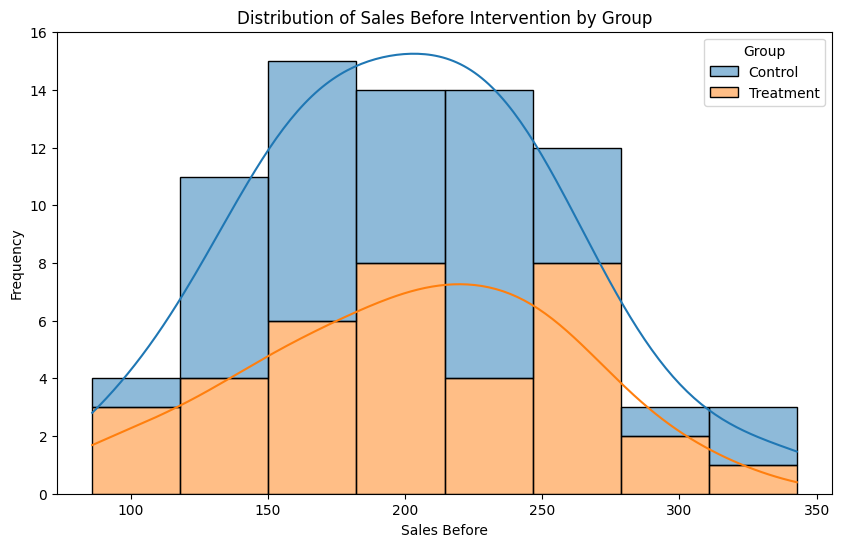

In [42]:
#1  histogram for Distribution of Sales Before Intervention by Group
def plot_sales_before():
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data_sample, x="Sales_Before", hue="Group", multiple="stack", kde=True)
    plt.title("Distribution of Sales Before Intervention by Group")
    plt.xlabel("Sales Before")
    plt.ylabel("Frequency")
    plt.show()

plot_sales_before()

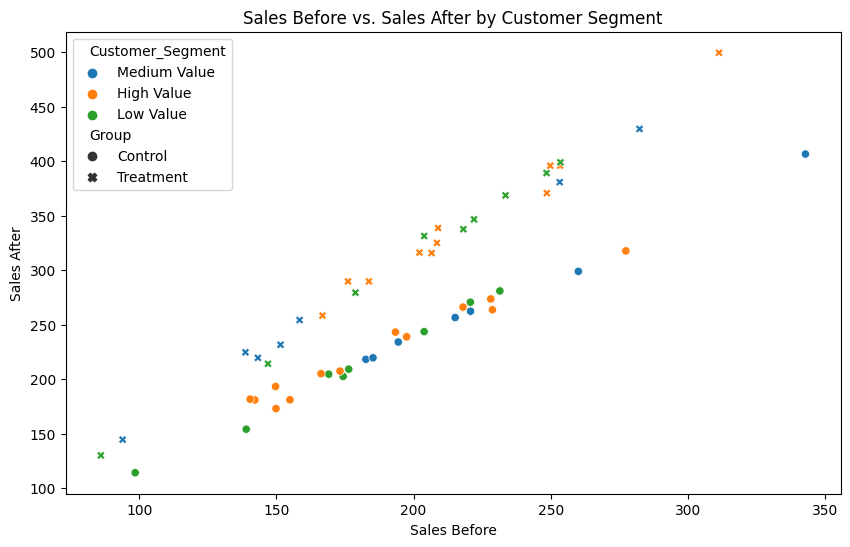

In [35]:
# 2. Scatter Plot: Sales Before vs Sales After
def plot_sales_before_after():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data_sample, x="Sales_Before", y="Sales_After", hue="Customer_Segment", style="Group")
    plt.title("Sales Before vs. Sales After by Customer Segment")
    plt.xlabel("Sales Before")
    plt.ylabel("Sales After")
    plt.show()

plot_sales_before_after()


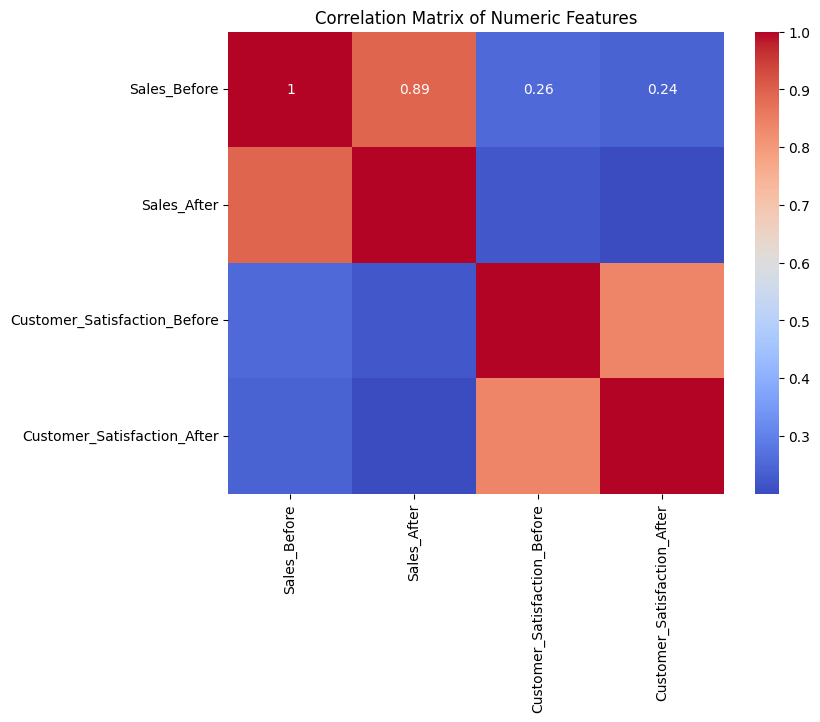

In [39]:
#3 correlation matrix dor numeric features
def plot_correlation_matrix():
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_data.corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix of Numeric Features")
    plt.show()

plot_correlation_matrix()

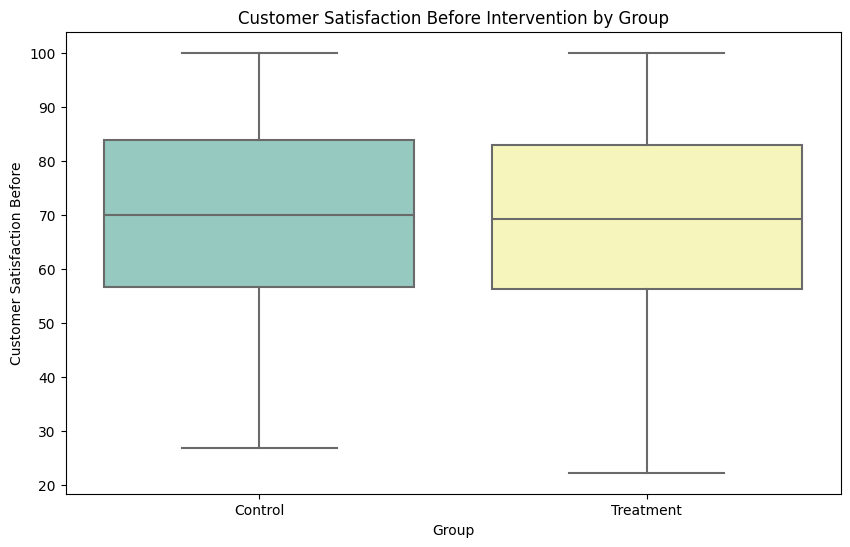

In [40]:
#4  box plot for customer satisfication before intervention by group
def plot_satisfaction_boxplot():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x="Group", y="Customer_Satisfaction_Before", palette="Set3")
    plt.title("Customer Satisfaction Before Intervention by Group")
    plt.xlabel("Group")
    plt.ylabel("Customer Satisfaction Before")
    plt.show()

plot_satisfaction_boxplot()